
# Attention mechanism

In [1]:
import torch

inputs embedded in 3-dimension vector

In [2]:
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

take 2nd input sequence and use dot product to compute unnormalized attention scores

In [3]:
query = inputs[1]
attn_scores_x2 = torch.empty(inputs.shape[0])
for i, x_1 in enumerate(inputs):
  attn_scores_x2[i] = torch.dot(query, x_1)
  print(attn_scores_x2)

tensor([0.9544, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
tensor([0.9544, 1.4950, 0.0000, 0.0000, 0.0000, 0.0000])
tensor([0.9544, 1.4950, 1.4754, 0.0000, 0.0000, 0.0000])
tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.0000, 0.0000])
tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 0.0000])
tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


multiply input sequence x2 with others

In [4]:
result = 0
for idx, element in enumerate(inputs[0]):
    result += inputs[0][idx]*query[idx]
    print(result)
    print('---')
    print(torch.dot(inputs[0], query))

tensor(0.2365)
---
tensor(0.9544)
tensor(0.3670)
---
tensor(0.9544)
tensor(0.9544)
---
tensor(0.9544)


normalize (sum up to 1) the attention score (omega) to attention weights (alpha)
Not preferred due inability to sustain larger value

In [5]:
attn_w2 = attn_scores_x2 / attn_scores_x2.sum()
print("Attention wights:", attn_w2)
print("Sum of attention weights:", attn_w2.sum())

Attention wights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum of attention weights: tensor(1.0000)


naive can also suffer from instability due to not able to handle under or over flow

In [6]:
def softmax_naive(x):
    return torch.exp(x)/torch.exp(x).sum(dim=0)
attn_w2_naive = softmax_naive(attn_scores_x2)
print("Attention wights (naive softmax):", attn_w2_naive)
print("......")
print("Sum of attention weights (naive softmax):", attn_w2_naive.sum())

Attention wights (naive softmax): tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
......
Sum of attention weights (naive softmax): tensor(1.)


softmax is recommended for better result

In [7]:
attn_w2 = torch.softmax(attn_scores_x2, dim=0)
print("Attention wights (softmax):", attn_w2)
print("......")
print("Sum of attention weights (softmax):", attn_w2.sum())

Attention wights (softmax): tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
......
Sum of attention weights (softmax): tensor(1.)


# notes
- weighted sum of input element(x[i to n] with respect to sepecific x(i.e 2)) is context vector (for example z of x(2) is z(2))
- unnormalized attention weights are called scores, when normalized (sum to 1) it is called attention weights
- q = query
- unnormalized attention score (w[omega]) w(21) = x(1)q(2)^T

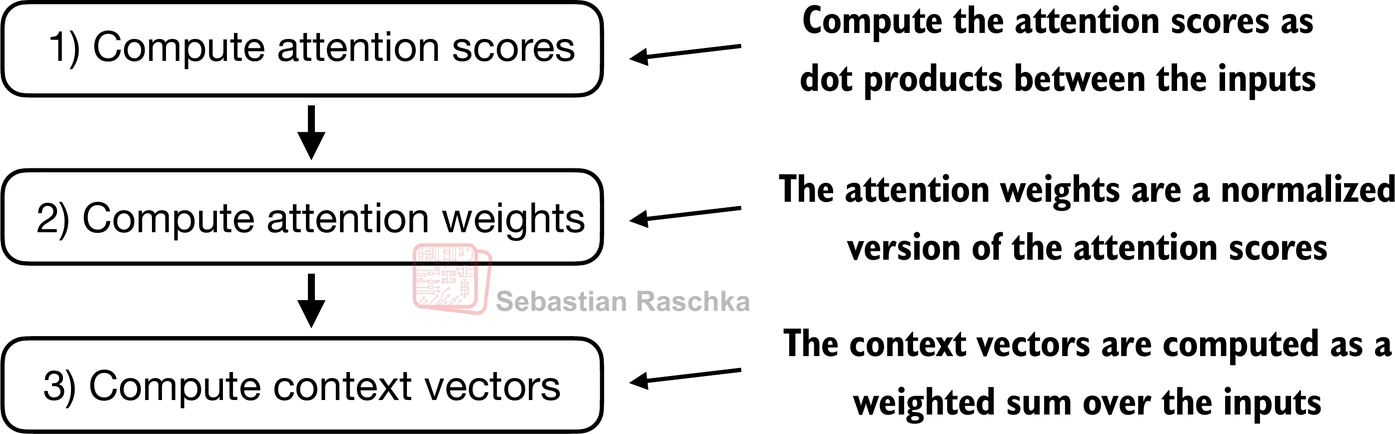


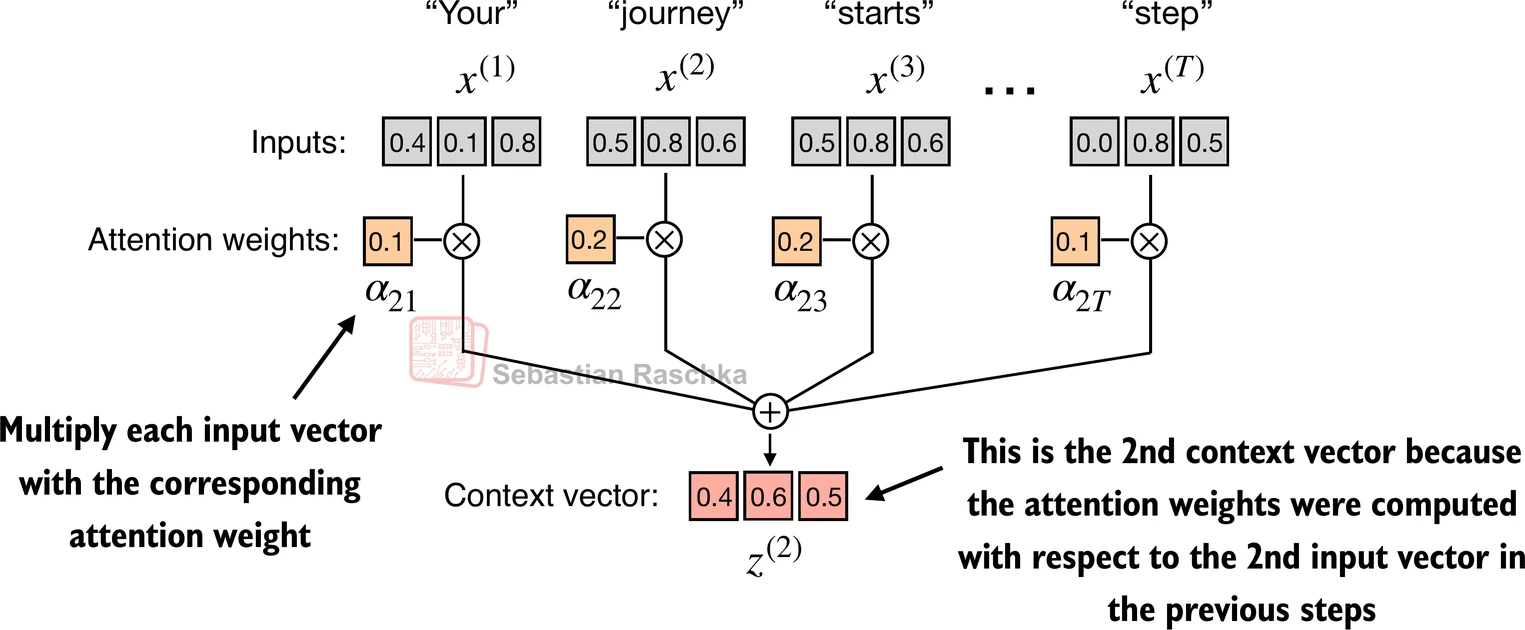

the process 3 step for all the inputs

In [8]:
attn_scores = inputs @ inputs.T
print("Attention scores matrix:\n", attn_scores)

Attention scores matrix:
 tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [11]:
attn_weights = torch.softmax(attn_scores, dim=1)
print(attn_weights)
print("-------------------------------")
#verification if the total attention weights for each query sum to 1
print("Sum of attention weights for each query:", attn_weights.sum(dim=1))

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])
-------------------------------
Sum of attention weights for each query: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [12]:
all_context_vectors = attn_weights@inputs
print("All context vectors:\n", all_context_vectors)

All context vectors:
 tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])
